## Expectation-Maximization Algorithm
***

In [1]:
from typing import Tuple

import matplotlib.pyplot as plt
import numpy as np
from numpy.typing import ArrayLike
from scipy.stats import norm

In [2]:
def e_step(mu, sig, weight, x) -> ArrayLike:
    """Perform the E-step of the Expectation-Maximization (EM) algorithm for a mixture of two normal 
    distributions.

    Args:
        mu (np.array): 1D numpy array of length 2 containing the mean values of the two normal 
            distributions.
        sig (np.array): 1D numpy array of length 2 containing the standard deviation values of the 
            two normal distributions.
        weight (np.array): 1D numpy array of length 2 containing the prior  probabilities of the 
            two normal distributions.
        x (ArrayLike): 1D numpy array or array-like object containing the observed data.

    Returns:
        np.array: 2D numpy array of shape (len(x), 2) containing the posterior probabilities of the 
            two normal distributions given the observed data. The first column corresponds to the 
            posterior probabilities of the first distribution, and the second column corresponds to 
            the posterior probabilities of the second distribution."""


    likeli_1 = norm(mu[0], sig[0]).pdf(x)
    likeli_2 = norm(mu[1], sig[1]).pdf(x)

    evidence = weight[0]*likeli_1 + weight[1]*likeli_2

    posterior = np.array([
        (weight[0]*likeli_1) / evidence,
        (weight[1]*likeli_2) / evidence
    ])
    return posterior

In [3]:
def m_step(posterior, x) -> Tuple[ArrayLike, ArrayLike]:
    """
    Perform the M-step of the Expectation-Maximization (EM) algorithm for a mixture of two normal 
    distributions.

    Args:
        posterior (ArrayLike): 2D numpy array of shape (n_samples, 2) containing the posterior 
            probabilities of the two normal distributions given the observed data.
        x (ArrayLike): 1D numpy array or array-like object containing the observed data.

    Returns:
        Tuple[np.array, np.array]: Tuple containing the estimated mean and standard deviation values 
            of the two normal distributions. The first element of the tuple corresponds to the mean 
            values, and has shape (2,). The second element of the tuple corresponds to the standard 
            deviation values, and has shape (2,).
    """
    size = [
        np.sum(posterior[0]),
        np.sum(posterior[1])
    ]
    mu = np.array([
        np.sum(x*posterior[0])/size[0],
        np.sum(x*posterior[1])/size[1]
    ])
    var = np.array([
        np.sum(posterior[0]*np.power(x-mu[0], 2))/size[0],
        np.sum(posterior[1]*np.power(x-mu[1], 2))/size[1]
    ])

    return mu, np.sqrt(var)


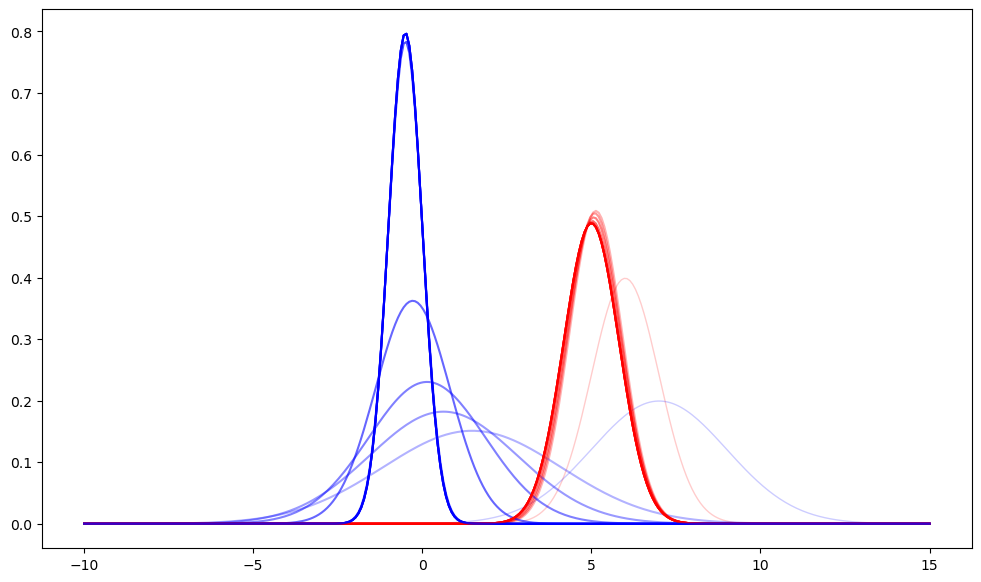

In [4]:
# Parameters
x      = np.array([-1, 0, 4, 5, 6])
mu     = np.array([6,7])
sig    = np.array([1,2])
weight = np.array([0.5, 0.5])
xaxis  = np.linspace(-10, 15, 300)


# Initialization
norm_1 = norm(mu[0], sig[0]).pdf(xaxis)
norm_2 = norm(mu[1], sig[1]).pdf(xaxis)
alpha = 0.2
plt.figure(figsize=(12,7))
plt.plot(xaxis, norm_1, color="red", label="N_1", lw=1, alpha=alpha)
plt.plot(xaxis, norm_2, color="blue", label="N_2", lw=1, alpha=alpha)


# EM Algorithm
for i in range(10):
    posterior = e_step(mu, sig, weight, x)
    mu, sig = m_step(posterior, x)

    norm_1 = norm(mu[0], sig[0]).pdf(xaxis)
    norm_2 = norm(mu[1], sig[1]).pdf(xaxis)

    alpha += 0.1
    plt.plot(xaxis, norm_1, color="red", alpha=alpha)
    plt.plot(xaxis, norm_2, color="blue", alpha=alpha)
